### 04. Model Training

#### 4.1 Linear Regression

In [1]:
# 무작위 선형 데이터셋 생성
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # = 가우시안 잡음(noise)

# 정규방정식을 사용한 theta hat 계산, inv() = 역행렬 계산, dot() = 행렬 곱
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x_0 = 1 을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best
# array ([[4.21], [2.77]])

array([[3.69569185],
       [3.13284641]])

In [2]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict
# array([[4.21], [9.76]])

array([[3.69569185],
       [9.96138467]])

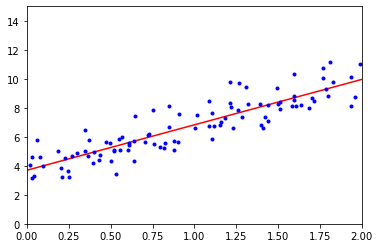

In [3]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
# 사이킷런을 활용한 예측
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
# array([4.21]), array([[2.77]])

(array([3.69569185]), array([[3.13284641]]))

In [5]:
lin_reg.predict(X_new)
# array([[4.21], [9.76]])

array([[3.69569185],
       [9.96138467]])

In [6]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.69569185],
       [3.13284641]])

In [7]:
# 유사역행렬
np.linalg.pinv(X_b).dot(y)
# array([[4.215], [2.770]])

array([[3.69569185],
       [3.13284641]])

#### 4.2 Gradient Descent

In [8]:
# 배치 경사 하강법

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.69569185],
       [3.13284641]])

In [10]:
# 확률적 경사 하강법

n_epochs = 50
t0, t1 = 5, 50 # 학습 스케쥴 파라미터

def learning_schedule(t):
	return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

print('start\n', theta)

for epoch in range(n_epochs):
	for i in range(m):
		random_index = np.random.randint(m)
		xi = X_b[random_index:random_index+1]
		yi = y[random_index:random_index+1]
		gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
		eta = learning_schedule(epoch * m + i)
		theta = theta - eta * gradients

print('end\n', theta)

start
 [[0.04975631]
 [1.05011439]]
end
 [[3.68275774]
 [3.14191147]]


In [12]:
# 경사 하강법 알고리즘을 사용하는 선형 회귀 모형
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.67611352]), array([3.11249603]))

#### 4.3 Polynomial Regression

In [13]:
# 2차 방정식을 활용한 비선형 데이터 생성 (quadratic equation)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print('변환 전:',X[0])
print('변환 후:',X_poly[0])

변환 전: [-0.13930815]
변환 후: [-0.13930815  0.01940676]


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09621186]), array([[0.98273819, 0.45076577]]))

#### 4.4 Learning Curve

In [21]:
import matplotlib.font_manager as fm
import matplotlib

fm.get_fontconfig_fonts()
font_location = "c:/windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [24]:
# 훈련 데이터에서 학습 곡선을 그리는 함수
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label='훈련 세트')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='검증 세트')
    plt.ylim([0.0, 3.0])
    plt.legend()

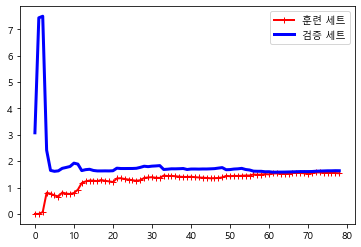

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

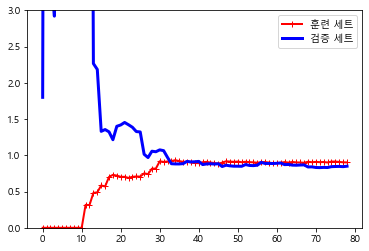

In [25]:
# 같은 데이터에 대한 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)

#### 4.5 Regression with Penalty